In [1]:
# Import manipulating files libraries
import os, glob
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   #if like me you do not have a lot of memory in your GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "" #then these two lines force keras to use your CPU

# Import graph/image plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Import loading and manipulating neuroimaging data library
import nibabel as nib

# Import array manipulating libraries
import numpy as np
import pandas as pd

# Import deep learning model libraries
import tensorflow as tf
import keras
from keras.callbacks import TensorBoard
from keras.models import Model, Sequential

from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization

from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

# Import date/time library to save models with date/time
from datetime import datetime
from tensorflow.keras.regularizers import l2

In [2]:
# Get data path
data_path = 'final data/*.nii.gz'
# Find all files within the location that matches our search string
files = glob.glob(data_path)

# Get the labels for our data from our csv file
Labels = pd.read_csv('labels.csv')
# Define our target from the column "Labels" as our y in our model
target = Labels['group']

In [3]:
# Loop through files and load all data files
data_all, images = [], []
for data_file in sorted(files):
    data = nib.load(data_file).get_fdata()
    first_vol = data[:,:,:,0]
    first = first_vol / 255
    data_all.append(first)
    
# Convert our list into a numpy array
images = np.asarray(data_all)

print(len(data_all))
print (np.shape(images))

120
(120, 64, 64, 34)


In [21]:
images[119]

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.04705882, 0.04313725, 0.04313725, ..., 0.04313725,
         0.04705882, 0.04313725],
        [0.04705882, 0.04313725, 0.05098039, ..., 0.04313725,
         0.04705882, 0.04313725],
        [0.04313725, 0.05098039, 0.03921569, ..., 0.04705882,
         0.04313725, 0.04313725],
        ...,
        [0.04705882, 0.05882353, 0.0627451 , ..., 0.05882353,
         0.0745098 , 0.05882353],
        [0.0

(64, 64)


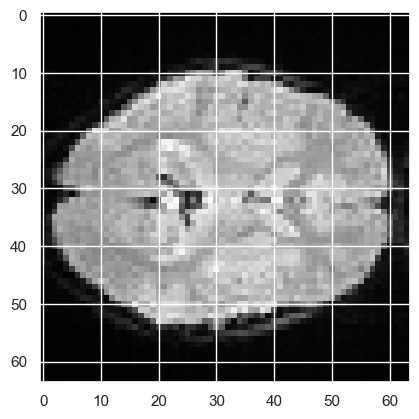

In [13]:
# Generate a random 2D numpy array
img = images[0,:,:,11]
print(img.shape)

# Plot the image using matplotlib
plt.imshow(img, cmap='gray')

# Show the plot
plt.show()


(64, 34)


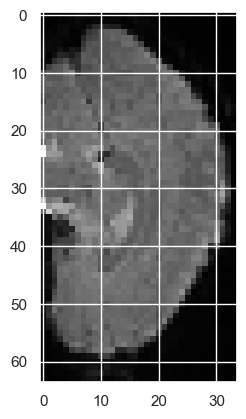

In [5]:
# Generate a random 2D numpy array
img = images[0,34,:,:]
print(img.shape)

# Plot the image using matplotlib
plt.imshow(img, cmap='gray')

# Show the plot
plt.show()

(64, 34)


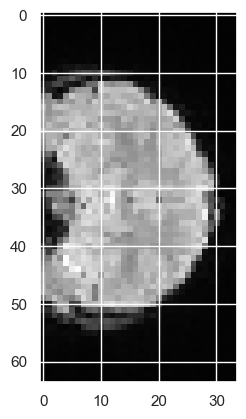

In [14]:
# Generate a random 2D numpy array
img = images[0,:,40,:]
print(img.shape)

# Plot the image using matplotlib
plt.imshow(img, cmap='gray')

# Show the plot
plt.show()

In [8]:
# for j in range(5,35):
#     print(j)

In [17]:
final_data = []
for i in range(0,59) :
    for j in range(0,30):
        final_data.append(images[i,:,:,j])
#         print(np.shape(arr))
        
# np.save('my_array.npy', arr)
print(np.shape(final_data))

(1770, 64, 64)


(64, 64)


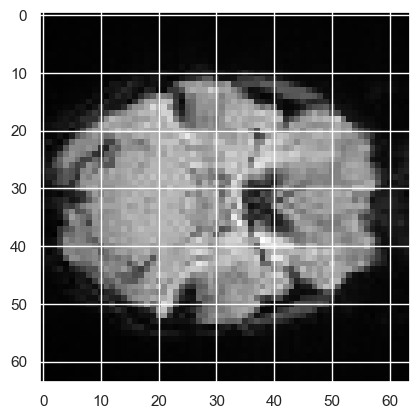

In [26]:
# Generate a random 2D numpy array
img = final_data[336]
print(img.shape)

# Plot the image using matplotlib
plt.imshow(img, cmap='gray')

# Show the plot
plt.show()


In [11]:
# # Create an example array of size (64, 34)
# a = np.random.rand(64, 34)

# # Pad the array with zeros to increase the size to (64, 64)
# b = np.pad(a, ((0, 0), (0, 30)), mode='constant')

# print('Original array shape:', a.shape)
# print('Padded array shape:', b.shape)


In [12]:
arr2, f_data = [], []

for i in range(0,59) :
    for j in range(15,45):
        arr2 = images[i,:,j,:]
#         print(np.shape(arr2))
        # Pad the array with zeros to increase the size to (64, 64)
        transformed_data = np.pad(arr2, ((0, 0), (0, 30)), mode='constant')
#         print(np.shape(transformed_data))
        f_data.append(transformed_data)
        
# np.save('my_array2.npy', arr2)
print(np.shape(f_data))

(1770, 64, 64)


(64, 64)


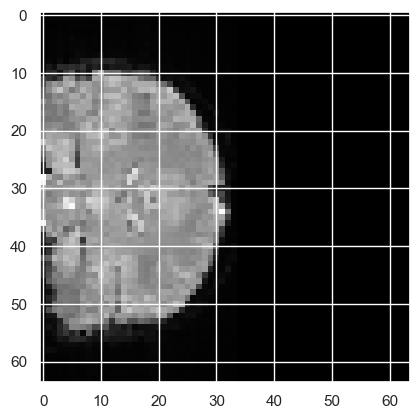

In [13]:
# Generate a random 2D numpy array
img = f_data[16]
print(img.shape)

# Plot the image using matplotlib
plt.imshow(img, cmap='gray')

# Show the plot
plt.show()


In [14]:
f_data[0].shape


(64, 64)

In [15]:
arr3 , f_data2 = [], []
for i in range(0,59) :
    for j in range(15,45):
        arr3 = images[i,j,:,:]
#         print(np.shape(arr3))
        # Pad the array with zeros to increase the size to (64, 64)
        transformed_data = np.pad(arr3, ((0, 0), (0, 30)), mode='constant')
#         print(np.shape(transformed_data))
        f_data2.append(transformed_data)
        
# np.save('my_array3.npy', arr3)
print(np.shape(f_data2))

(1770, 64, 64)


(64, 64)


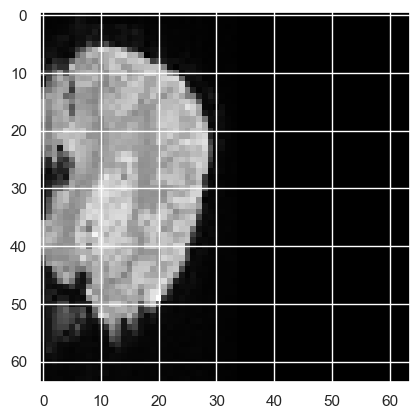

In [16]:
# Generate a random 2D numpy array
img = f_data2[1199]
print(img.shape)

# Plot the image using matplotlib
plt.imshow(img, cmap='gray')

# Show the plot
plt.show()


In [17]:
data_dyslexic = []
data_dyslexic = final_data + f_data + f_data2
print(np.shape(data_dyslexic))

(5310, 64, 64)


In [18]:
np.save('dyslexic_data.npy', data_dyslexic)

In [22]:
# create numpy data with 5310 samples
data = np.zeros((10620,))

# create a DataFrame with the labeled data
df = pd.DataFrame({'Label': data})

# save the DataFrame as a CSV file
df.to_csv('labeled_data.csv', index=False)

(64, 64)


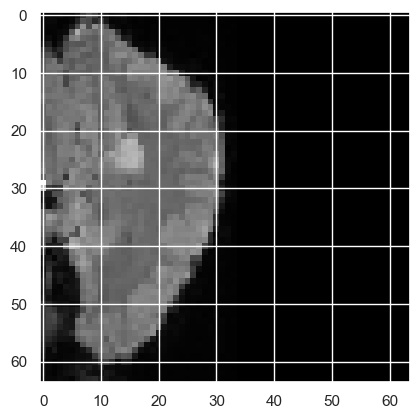

In [32]:
# Generate a random 2D numpy array
img = data_dyslexic[5200]
print(img.shape)

# Plot the image using matplotlib
plt.imshow(img, cmap='gray')

# Show the plot
plt.show()

In [6]:
# Load the data from the .npy file
data_con = np.load('non_dyslexic_data.npy')

# Print the loaded data
print(data_con.shape)


(5310, 64, 64)


In [7]:
# Load the data from the .npy file
data_dys = np.load('dyslexic_data.npy')

# Print the loaded data
print(data_dys.shape)


(5310, 64, 64)


In [8]:
concatenated_array = np.concatenate((data_dys, data_con))

# print the concatenated array
print(concatenated_array.shape)

(10620, 64, 64)


In [9]:
# Get the labels for our data from our csv file
Labels = pd.read_csv('labeled_data.csv')
# Define our target from the column "Labels" as our y in our model
target = Labels['Label']

In [10]:
# Add a fourth dimension with a value of 3
concatenated_array = np.expand_dims(concatenated_array, axis=-1)
full_data = np.repeat(concatenated_array, 3, axis=-1)

# The resulting shape of arr will be (120, 4096, 4096, 3)
print(full_data.shape)

(10620, 64, 64, 3)


In [11]:
target.head

<bound method NDFrame.head of 0        0
1        0
2        0
3        0
4        0
        ..
10615    1
10616    1
10617    1
10618    1
10619    1
Name: Label, Length: 10620, dtype: int64>

In [12]:
# Create list of indices
N = full_data.shape[0]
indexes = np.arange(N)

# Divide our dataset into dyslexics and controls to have a balanced train, validation and test sets
dis = indexes[:5310]
con = indexes[5310:]

#  Cut the dataset at 80% to create the training, 10% validation and 10% test set
size = dis.shape[0]
split_1 = int(0.7 * size)
split_2 = int(0.85 * size)

# Shuffle our dyslexics and controls arrays to create random indexes
np.random.shuffle(np.asarray(dis))
np.random.shuffle(np.asarray(con))

# Create our indexes for our train, validation and test sets according to our previous division (80%, 10%, 10%)
indexes_train_dis, indexes_train_con = dis[:split_1], con[:split_1]
indexes_val_dis, indexes_val_con   = dis[split_1:split_2], con[split_1:split_2]
indexes_test_dis, indexes_test_con = dis[split_2:], con[split_2:]

# We concatenate our training, validation and test indexes for dyslexics and controls
# By doing that we ensure that each set is balanced with the same number of dyslexics and controls
indexes_train = np.concatenate((indexes_train_dis, indexes_train_con), axis=None)
indexes_val = np.concatenate((indexes_val_dis, indexes_val_con), axis=None)
indexes_test = np.concatenate((indexes_test_dis, indexes_test_con), axis=None)


# Split the data into training, validation and test sets according to the indexes created previously
X_train = full_data[indexes_train, ...]
X_val = full_data[indexes_val, ...]
X_test = full_data[indexes_test, ...]

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(7432, 64, 64, 3)
(1594, 64, 64, 3)
(1594, 64, 64, 3)


In [13]:
# Create outcome variable for each set (training, validation and test)
y_train = target[indexes_train] 
y_val   = target[indexes_val]
y_test  = target[indexes_test]
print(y_train)

742     0
3874    0
1113    0
2502    0
5252    0
       ..
9955    1
7233    1
7092    1
8811    1
7340    1
Name: Label, Length: 7432, dtype: int64


In [14]:
# Our vectorized labels
y_train = np.asarray(y_train).astype('int32')
y_test = np.asarray(y_test).astype('int32')
y_val = np.asarray(y_val).astype('int32')

In [15]:
y_train = tf.one_hot(y_train, 2)
y_test = tf.one_hot(y_test, 2)
y_val = tf.one_hot(y_val, 2)
print(y_val) 

tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]], shape=(1594, 2), dtype=float32)


In [16]:
full_data[0].shape

(64, 64, 3)

In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from vit_keras import vit

In [73]:
input_shape = (64, 64, 3)
num_classes = 2

In [35]:
# vit_model = vit.vit_b32(
#     image_size=input_shape[0],
#     activation='softmax',
#     pretrained=True,
#     include_top=False,
#     pretrained_top=False,
#     classes=num_classes
# )

In [44]:
# inputs = layers.Input(shape=input_shape)
# x = vit_model(inputs)
# x = layers.Flatten()(x)
# outputs = layers.Dense(num_classes, activation='softmax')(x)

# model = keras.Model(inputs=inputs, outputs=outputs)

In [36]:
# # Freeze the layers of the pre-trained model
# for layer in vit_model.layers:
#     layer.trainable = False

# # Add a custom head for our target task
# inputs = keras.Input(shape=(64, 64, 3))
# x = vit_model(inputs)
# x = keras.layers.Flatten()(x)
# outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
# model = keras.Model(inputs, outputs)

In [75]:
from sklearn.model_selection import KFold

input_shape = (64, 64, 3)
num_classes = 2
n_splits = 5

vit_model = vit.vit_b32(
    image_size=input_shape[0],
    activation='softmax',
    pretrained=True,
    include_top=False,
    pretrained_top=False,
    classes=num_classes
)

inputs = layers.Input(shape=input_shape)
x = vit_model(inputs)
x = layers.Flatten()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile( optimizer = keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Split data into training and validation sets
kf = KFold(n_splits=n_splits)
X = np.concatenate((X_train, X_val))
y = np.concatenate((y_train, y_val))
for i, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Train the model
    model.fit(X_train, y_train, epochs=4, batch_size=45, validation_data=(X_val, y_val))


C:\Program Files\Python310\lib\site-packages\vit_keras\utils.py:81: UserWarning: Resizing position embeddings from 12, 12 to 2, 2
  warnings.warn(


Epoch 1/4
161/161 [==============================] - 2117s 13s/step - loss: 0.7328 - accuracy: 0.5870 - val_loss: 0.9605 - val_accuracy: 0.0498
Epoch 2/4
161/161 [==============================] - 677s 4s/step - loss: 0.6639 - accuracy: 0.6150 - val_loss: 1.2396 - val_accuracy: 0.0138
Epoch 3/4
161/161 [==============================] - 709s 4s/step - loss: 0.6455 - accuracy: 0.6450 - val_loss: 0.7401 - val_accuracy: 0.5332
Epoch 4/4
161/161 [==============================] - 703s 4s/step - loss: 0.5849 - accuracy: 0.6938 - val_loss: 1.0660 - val_accuracy: 0.3450
Epoch 1/4
161/161 [==============================] - 694s 4s/step - loss: 0.5165 - accuracy: 0.7492 - val_loss: 0.6498 - val_accuracy: 0.6681
Epoch 2/4
161/161 [==============================] - 698s 4s/step - loss: 0.4485 - accuracy: 0.7895 - val_loss: 0.7866 - val_accuracy: 0.6404
Epoch 3/4
161/161 [==============================] - 666s 4s/step - loss: 0.3890 - accuracy: 0.8205 - val_loss: 0.6472 - val_accuracy: 0.6992
Epoc

In [45]:
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=4, batch_size=45, validation_data=(X_val, y_val))


Epoch 1/4
166/166 [==============================] - 352s 2s/step - loss: 0.0060 - accuracy: 0.9964 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/4
166/166 [==============================] - 307s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/4
166/166 [==============================] - 308s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/4
166/166 [==============================] - 302s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [37]:
# # Compile the model
# model.compile(
#     optimizer = keras.optimizers.Adam(learning_rate=1e-4),
#     loss = 'categorical_crossentropy',
#     metrics = ['accuracy']
# )

# model.fit(X_train, y_train, epochs=4, batch_size=45, validation_data=(X_val, y_val))

Epoch 1/4
142/142 [==============================] - 73s 424ms/step - loss: 0.0710 - accuracy: 0.9829 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 2/4
142/142 [==============================] - 56s 394ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3/4
142/142 [==============================] - 56s 395ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 9.4456e-04 - val_accuracy: 1.0000
Epoch 4/4
142/142 [==============================] - 57s 403ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 5.7373e-04 - val_accuracy: 1.0000


In [38]:
# # Unfreeze some layers of the pre-trained model for fine-tuning
# for layer in vit_model.layers[-6:]:
#     layer.trainable = True

# # Lower the learning rate for fine-tuning
# model.compile(
#     optimizer = keras.optimizers.Adam(learning_rate=1e-5),
#     loss = 'categorical_crossentropy',
#     metrics = ['accuracy']
# )

In [39]:
# model.fit(X_train, y_train, epochs=4, batch_size=45, validation_data=(X_val, y_val))

Epoch 1/4
142/142 [==============================] - 132s 820ms/step - loss: 5.9428e-05 - accuracy: 1.0000 - val_loss: 9.3616e-07 - val_accuracy: 1.0000
Epoch 2/4
142/142 [==============================] - 114s 805ms/step - loss: 3.8470e-06 - accuracy: 1.0000 - val_loss: 3.5645e-07 - val_accuracy: 1.0000
Epoch 3/4
142/142 [==============================] - 120s 845ms/step - loss: 1.9365e-06 - accuracy: 1.0000 - val_loss: 1.8622e-07 - val_accuracy: 1.0000
Epoch 4/4
142/142 [==============================] - 137s 965ms/step - loss: 1.2433e-06 - accuracy: 1.0000 - val_loss: 1.0613e-07 - val_accuracy: 1.0000


In [78]:
model.evaluate(X_test, y_test)

50/50 [==============================] - 74s 1s/step - loss: 0.1149 - accuracy: 0.9561


[0.11490090191364288, 0.9560853242874146]

In [76]:
model.save("vit_model.h5")

In [77]:
model.save("vit_model")

INFO:tensorflow:Assets written to: vit_model\assets


INFO:tensorflow:Assets written to: vit_model\assets


In [5]:
from tensorflow.keras.models import load_model

model = load_model('vit_model')

C:\Program Files\Python310\lib\site-packages\keras\layers\core\lambda_layer.py:324: UserWarning: vit_keras.vit is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(
C:\Program Files\Python310\lib\site-packages\keras\layers\core\lambda_layer.py:324: UserWarning: vit_keras.layers is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(


In [18]:
model.evaluate(X_test, y_test)

50/50 [==============================] - 11s 214ms/step - loss: 0.0540 - accuracy: 0.9824


[0.05400010198354721, 0.9824341535568237]

In [19]:
# Analyze prediction values



predicted = model.predict(X_test)
predicted[:, :]

50/50 [==============================] - 14s 247ms/step


array([[9.9985015e-01, 1.4977525e-04],
       [9.8936170e-01, 1.0638288e-02],
       [9.9973589e-01, 2.6405777e-04],
       ...,
       [2.8894518e-03, 9.9711049e-01],
       [1.7261476e-03, 9.9827385e-01],
       [1.2398371e-04, 9.9987602e-01]], dtype=float32)

In [20]:
# Import confusion matrix and classification report from scikit-learn
from sklearn.metrics import confusion_matrix, classification_report
Y_prediction = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(predicted,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(target[indexes_test], Y_pred_classes) 
print(classification_report(target[indexes_test], Y_pred_classes))

50/50 [==============================] - 12s 240ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       797
           1       0.99      0.97      0.98       797

    accuracy                           0.98      1594
   macro avg       0.98      0.98      0.98      1594
weighted avg       0.98      0.98      0.98      1594



In [21]:
print(confusion_mtx)

[[789   8]
 [ 20 777]]


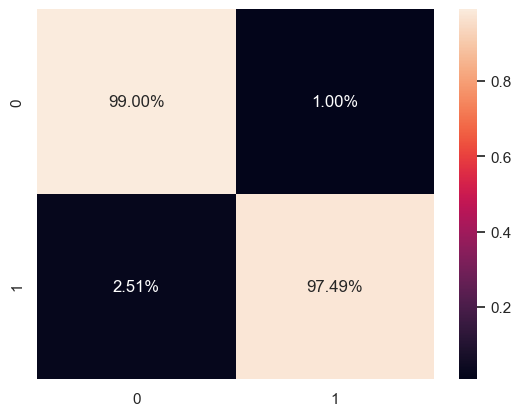

In [24]:
sns.heatmap(confusion_mtx/797, annot=True, fmt='.2%');

In [25]:
# Assume y_true and y_pred are the true and predicted labels for the test data, respectively
tn, fp, fn, tp = confusion_matrix(target[indexes_test], Y_pred_classes).ravel()

print(tn, fp, fn, tp)
specificity = tn / (tn + fp)
print(specificity)

789 8 20 777
0.9899623588456713


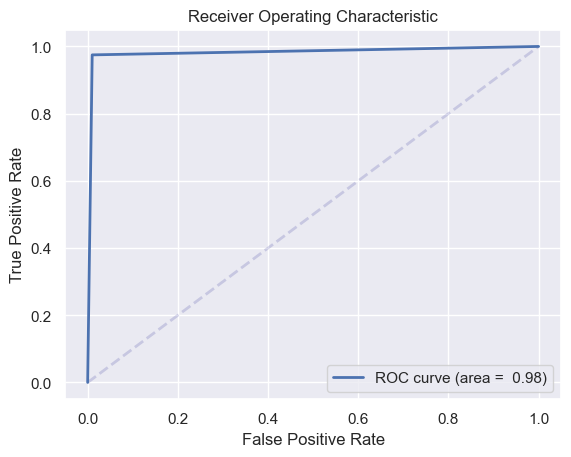

In [27]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(np.argmax(y_test, axis =1), np.argmax(predicted, axis =1), pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

lw = 2
plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.15)
plt.plot(fpr, tpr, lw=lw, label=f'ROC curve (area = {roc_auc: 0.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

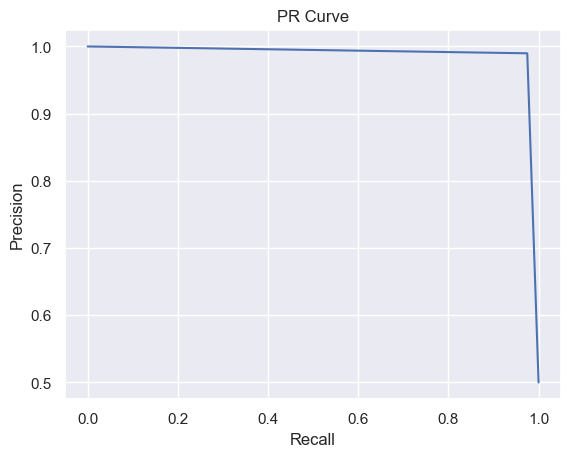

In [28]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assume y_true and y_score are the true labels and predicted scores for the test data, respectively
precision, recall, threshold = precision_recall_curve(target[indexes_test], Y_pred_classes)

# Plot the PR curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve') 
plt.show()